**Cancer Cluster Midterm Project**

Model: For this project I initally used a poisson distribution model and then compared that model to a uniform distribution. I compared to the two to show that the intial data better fit the poisson distribution than a uniform distribution.

Data: The data for this project came from the londonIncidents.npz or otherwise known as data set 5. This data was taken from bombs dropped in over london during WWII, and is used as an example for cancer clusters.

**1. Create a graphical representation of these points**

Initially the problem requested a
grpahical representation of the data, specifically a scatter plot.  

The challenge with this code intially was trying to upload the data set. For this one the code will not run if you don't specifically download the data into the contents file. In order to upload the file I had to

*   1. Download the data set on my computer.
*   2. On the left far side bar hit the file icon.
*   3. Navigate through the files until I found the one assigned content.
*   4. Uploaded the data set into the content file using the upload icon at the top.

Once the data was in the content file the code ran smoothly.



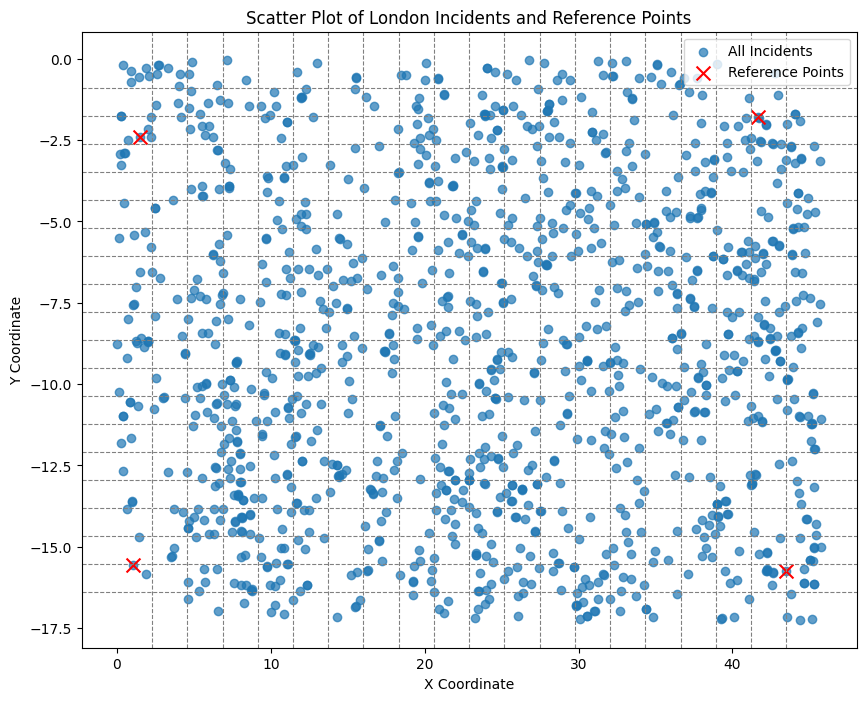

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for data operations

# Load the .npz file and extract data (copied from cell 334f7dd9)
data = np.load('/content/londonIncidents.npz')
all_data = data['all']
allrefs_data = data['allrefs']

# Create a scatter plot for 'all_data'
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], label='All Incidents', alpha=0.7)

# Create a scatter plot for 'allrefs_data'
plt.scatter(allrefs_data[:, 0], allrefs_data[:, 1], color='red', marker='x', s=100, label='Reference Points')

plt.title('Scatter Plot of London Incidents and Reference Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
# plt.grid(True) # Removed the original grid line command

# Add vertical lines to divide the plot into N equal strips
N = 20

# Determine the overall x-axis limits from both datasets
min_x = min(np.min(all_data[:, 0]), np.min(allrefs_data[:, 0]))
max_x = max(np.max(all_data[:, 0]), np.max(allrefs_data[:, 0]))

# Calculate the width of each strip
strip_width_x = (max_x - min_x) / N

# Add vertical lines
for i in range(1, N):
    plt.axvline(x=min_x + i * strip_width_x, color='gray', linestyle='--', linewidth=0.8)

# Add horizontal lines to divide the plot into M equal strips
M = 20 # To create 400 cells (20x20)

# Determine the overall y-axis limits from both datasets
min_y = min(np.min(all_data[:, 1]), np.min(allrefs_data[:, 1]))
max_y = max(np.max(all_data[:, 1]), np.max(allrefs_data[:, 1]))

# Calculate the height of each strip
strip_width_y = (max_y - min_y) / M

# Add horizontal lines
for i in range(1, M):
    plt.axhline(y=min_y + i * strip_width_y, color='gray', linestyle='--', linewidth=0.8)

plt.show()

**2. Find the freqeuncy of dots within each cell.**

The data showed the freqeuncy of dots within each cell. For example:  


*   F(0 dots in a cell): 0.1150 means that 11.5% of all 400 grid cells had zero dots.
*   F(1 dots in a cell): 0.1450 means 14.5% of cells had 1 dot.

The most notable data point is:


*   F(2 dots in a cell): 0.1925 means 19.5% of cells has two dots.

This output provides the observed probability distribution of dot counts per cell.






In [ ]:
import numpy as np
from collections import Counter

# Retrieve N and M from the previous cell's execution, or set them if not available in kernel state.
# Assuming N and M are 20 as set in the previous step for 400 cells.
N = 20
M = 20

# Get the overall x and y limits, and strip widths (recalculating to ensure consistency)
min_x = min(np.min(all_data[:, 0]), np.min(allrefs_data[:, 0]))
max_x = max(np.max(all_data[:, 0]), np.max(allrefs_data[:, 0]))
min_y = min(np.min(all_data[:, 1]), np.min(allrefs_data[:, 1]))
max_y = max(np.max(all_data[:, 1]), np.max(allrefs_data[:, 1]))

strip_width_x = (max_x - min_x) / N
strip_width_y = (max_y - min_y) / M

# Initialize a 2D array to store the count of dots in each cell
cell_counts = np.zeros((M, N), dtype=int) # (rows, columns) = (M, N)

# Iterate through each incident point in all_data
for x, y in all_data:
    # Determine which column the point falls into
    col_idx = int((x - min_x) / strip_width_x)
    # Determine which row the point falls into
    row_idx = int((y - min_y) / strip_width_y)

    # Ensure indices are within bounds (for points exactly on max_x or max_y boundary)
    col_idx = np.clip(col_idx, 0, N - 1)
    row_idx = np.clip(row_idx, 0, M - 1)

    # Increment the counter for that cell
    cell_counts[row_idx, col_idx] += 1

print("Count of incidents in each cell (rows=M, columns=N):")
print(cell_counts)

# Flatten the cell_counts array to get a list of counts per cell
flattened_counts = cell_counts.flatten()

# Calculate the frequency of each dot count 'l'
# Using Counter to get unique counts and their occurrences
count_distribution = Counter(flattened_counts)

# Calculate F(l) - the frequency of cells with 'l' dots
total_cells = N * M
frequency_Fl = {l: count / total_cells for l, count in sorted(count_distribution.items())}

print("\nFrequency F(l) of cells having 'l' dots:")
for l, freq in frequency_Fl.items():
    print(f"F({l} dots in a cell): {freq:.4f}")

Count of incidents in each cell (rows=M, columns=N):
[[ 0  0  2  1  4  0  4  0  2  3  4  3  0 11  3  4  0  4  0  4]
 [ 2  0  5  6  7  3  2  2  6  0  6  5  4  6  5  0  1  3  8  5]
 [ 1  3  1  2  5  3  0  4  2  2  6  2  3  2  3  3  4  1  4  7]
 [ 1  2 10 12  3  3  0  3  1  5  5  5  4  1  4  1  5  5  1  4]
 [ 2  0  2  9  2  3  1  6  0 12  3 11  1  0  3  0  0  6  3  4]
 [ 1  2  4  7  4  3  8  5  2  6  8  3  3  1  2  1  2  1  3  1]
 [ 2  0  2  5  3  4  0  3  0  2  2  2  1  4  3  2  2  0  0  5]
 [ 5  4  6  5  6  4  2  1  0  4  5  2  4  0  2  7  5  2  6  7]
 [ 1  1  5  5  4  3  1  1  0  3  7  2  1  3  3  4  7  5  1  5]
 [ 8  2  1  3  3 11  4  5  1  2  3  2  5  7  3  1  3  3  8  2]
 [ 2  2  4  2  2  2  1  3  3  3  4  0  1  4  0  2  2  5  9  5]
 [ 3  1  7  1  3  3  5  4  1  4  4  3  3  2  5  5  5  1  2  4]
 [ 1  2  2  1  4  4  5  3  2  2  4  3  5  0  3  3  5  8  5  2]
 [ 4  0  3  1  4  2  3  0  3  5  5  3  3  5  1  5  1  6  7  5]
 [ 1  3  0  0  2  5  1  1  3  4  4  3  4  4  2  7  6  0  2  6]
 [

**3. Find the probability of a dot within a given cell.**

In [ ]:
# Calculate Pest(l) = F(l) / (N*M)
# N and M are 20, so N*M = 400 (total_cells)

Pest_l = {l: freq / total_cells for l, freq in frequency_Fl.items()}

print("Probability Pest(l) = F(l) / (N*M) that a cell will have 'l' dots:")
for l, prob in Pest_l.items():
    print(f"Pest({l} dots in a cell): {prob:.8f}")

Probability Pest(l) = F(l) / (N*M) that a cell will have 'l' dots:
Pest(0 dots in a cell): 0.00028750
Pest(1 dots in a cell): 0.00036250
Pest(2 dots in a cell): 0.00048125
Pest(3 dots in a cell): 0.00042500
Pest(4 dots in a cell): 0.00033750
Pest(5 dots in a cell): 0.00030000
Pest(6 dots in a cell): 0.00011250
Pest(7 dots in a cell): 0.00008750
Pest(8 dots in a cell): 0.00004375
Pest(9 dots in a cell): 0.00001875
Pest(10 dots in a cell): 0.00001250
Pest(11 dots in a cell): 0.00001875
Pest(12 dots in a cell): 0.00001250


**4.Find the average number of dots per cell.**

The avergae number was found to be 3.095.

In [ ]:
import numpy as np

# Load the .npz file
data = np.load('/content/londonIncidents.npz')

# Print the keys (array names) available in the .npz file
print("Keys in londonIncidents.npz:", data.keys())

# Inspect the 'all' array
if 'all' in data:
    all_data = data['all']
    print(f"\nShape of 'all' array: {all_data.shape}")
    print("First 5 rows of 'all' array:")
    print(all_data[:5])

# Inspect the 'allrefs' array
if 'allrefs' in data:
    allrefs_data = data['allrefs']
    print(f"\nShape of 'allrefs' array: {allrefs_data.shape}")
    print("First 5 rows of 'allrefs' array:")
    print(allrefs_data[:5])

Keys in londonIncidents.npz: KeysView(NpzFile '/content/londonIncidents.npz' with keys: all, allrefs)

Shape of 'all' array: (1238, 2)
First 5 rows of 'all' array:
[[ 0.4178 -0.1783]
 [ 0.918  -0.3686]
 [ 0.9239 -0.7224]
 [ 0.2707 -1.758 ]
 [ 0.2295 -1.7696]]

Shape of 'allrefs' array: (4, 2)
First 5 rows of 'allrefs' array:
[[  1.5124  -2.3989]
 [  1.0195 -15.559 ]
 [ 41.6822  -1.8001]
 [ 43.4898 -15.7566]]


In [ ]:
total_incidents = all_data.shape[0]
total_cells = N * M

u = total_incidents / total_cells

print(f"Average number of incidents per cell (u): {u:.4f}")

Average number of incidents per cell (u): 3.0950


**5.Calculate a theoretical poisson distribution data set.**

This was obtain in order to compare with our original data to see if it fits into a poisson distribution.

In [ ]:
from scipy.stats import poisson

# Define the maximum observed number of incidents per cell
max_l_observed = 12

# Generate a range of l values from 0 up to max_l_observed
l_values = np.arange(max_l_observed + 1)

# Calculate theoretical Poisson probabilities P(l) using the calculated 'u'
theoretical_poisson_probs = {l: poisson.pmf(l, u) for l in l_values}

print("Theoretical Poisson Probabilities P(l) for 'l' dots in a cell:")
for l, prob in theoretical_poisson_probs.items():
    print(f"P({l} dots in a cell): {prob:.8f}")

Theoretical Poisson Probabilities P(l) for 'l' dots in a cell:
P(0 dots in a cell): 0.04527501
P(1 dots in a cell): 0.14012616
P(2 dots in a cell): 0.21684524
P(3 dots in a cell): 0.22371200
P(4 dots in a cell): 0.17309716
P(5 dots in a cell): 0.10714714
P(6 dots in a cell): 0.05527007
P(7 dots in a cell): 0.02443727
P(8 dots in a cell): 0.00945417
P(9 dots in a cell): 0.00325118
P(10 dots in a cell): 0.00100624
P(11 dots in a cell): 0.00028312
P(12 dots in a cell): 0.00007302


**6.Plot both the theoretical poisson distribution data set and the original london data set.**



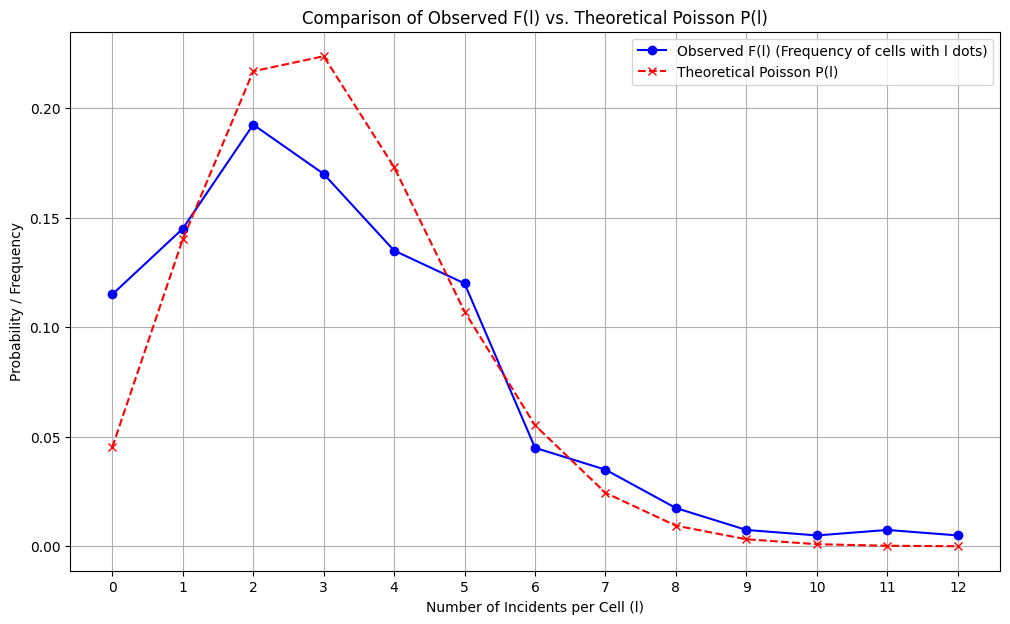

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
observed_l_values = sorted(Pest_l.keys())
observed_probabilities = [Pest_l[l] * total_cells for l in observed_l_values] # Scale Pest_l back to F(l) for direct comparison

theoretical_l_values = sorted(theoretical_poisson_probs.keys())
theoretical_probabilities = [theoretical_poisson_probs[l] for l in theoretical_l_values]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot observed frequencies
plt.plot(observed_l_values, observed_probabilities, marker='o', linestyle='-', color='blue', label='Observed F(l) (Frequency of cells with l dots)')

# Plot theoretical Poisson probabilities
plt.plot(theoretical_l_values, theoretical_probabilities, marker='x', linestyle='--', color='red', label='Theoretical Poisson P(l)')

plt.title('Comparison of Observed F(l) vs. Theoretical Poisson P(l)')
plt.xlabel('Number of Incidents per Cell (l)')
plt.ylabel('Probability / Frequency')
plt.xticks(np.arange(min(observed_l_values), max(observed_l_values) + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


**Analysis of Observed F(l) vs. Theoretical Poisson P(l)**

The generated plot compares the observed frequency of dots per cell, F(l), with the theoretical Poisson probability distribution, P(l), using the calculated average number of incidents per cell, u = 3.0950.

**Observations:**

*   **Shape Similarity:** The overall shape of the observed distribution generally follows the bell-like curve characteristic of a Poisson distribution, peaking around l=2 or l=3 and then decreasing for higher l values.
*   **Differences at Extremes:**
    *   For l=0 (cells with no dots), the observed frequency F(0) is significantly higher than the theoretical Poisson probability P(0). This suggests that there are more empty cells in the observed data than what a pure Poisson process would generate. This could mean clustering or sparsity in the dot distribution.
    *   For l=1, l=2, and l=3, the observed frequencies are relatively close to the theoretical probabilities, with F(2) being higher and F(3) being slightly lower than P(2) and P(3) respectively.
    *   For l values past 5-6, the observed frequencies tend to be lower than the theoretical probabilities, indicating fewer cells with a very high number of dots than predicted by the Poisson model.

**Interpretation:**

The discrepancies, particularly at l=0 and for higher l values, suggest that the distribution of London dots might not perfectly adhere to a simple Poisson process. A pure Poisson distribution assumes that events occur independently and with a constant average rate across all locations. The observed pattern, with more empty cells and fewer very densely populated cells than expected, could imply:

1.  **Clustering:** dots might be clustered in certain areas, leaving other areas completely empty or with very few dots. This would result in a higher F(0) and potentially a more peaked distribution around the mean, but perhaps fewer extreme high counts.
2.  **Non-uniformity:** The average rate (u) might not be uniform across all cells. Some regions might genuinely have a lower dot rate, while others have a higher rate, leading to deviations from a single Poisson distribution fit.

In summary, while the Poisson distribution provides a reasonable first approximation, the plot highlights areas where the observed dot distribution deviates, suggesting that underlying spatial patterns or non-uniformity in incident occurrence rates are at play.

**7.Generate a uniform random data set, and create a scatter plot.**

The next part of the problem is to show the difference between a uniform distribution and a poisson distribution. The data at the beginning follows a poisson distribution, however we must rule out if the data follows a uniform distribution.

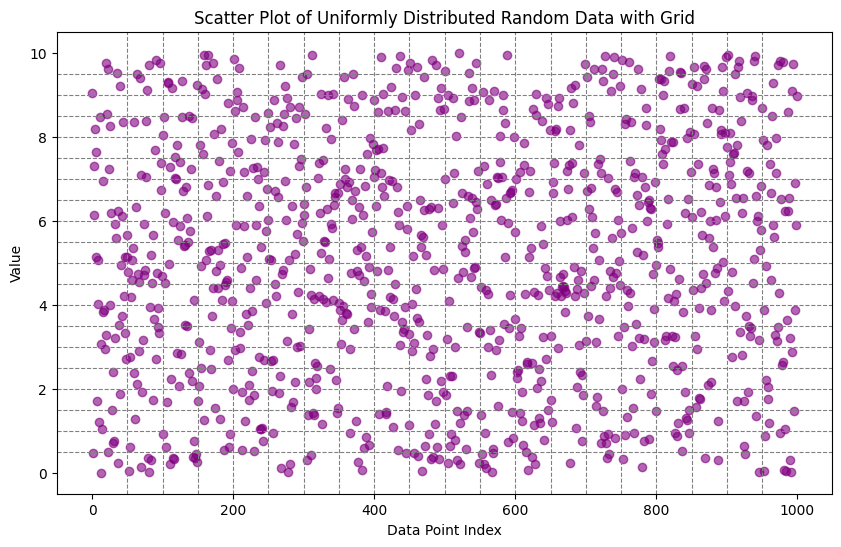

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'uniform_random_data' is still available in the kernel state.
# If not, you can uncomment the line below to regenerate it:
# uniform_random_data = np.random.uniform(low=0.0, high=10.0, size=1000)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(uniform_random_data)), uniform_random_data, alpha=0.6, color='purple')

plt.title('Scatter Plot of Uniformly Distributed Random Data with Grid')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

# Remove original grid lines
# plt.grid(True) # Commented out or removed

# Add vertical lines to divide the plot into N equal strips
N = 20
min_x = 0 # X-axis starts from index 0
max_x = len(uniform_random_data) # X-axis goes up to the number of data points
strip_width_x = (max_x - min_x) / N

for i in range(1, N):
    plt.axvline(x=min_x + i * strip_width_x, color='gray', linestyle='--', linewidth=0.8)

# Add horizontal lines to divide the plot into M equal strips
M = 20
min_y = np.min(uniform_random_data)
max_y = np.max(uniform_random_data)
strip_width_y = (max_y - min_y) / M

for i in range(1, M):
    plt.axhline(y=min_y + i * strip_width_y, color='gray', linestyle='--', linewidth=0.8)

plt.show()

**8.Calculate the freqeuncy, probability, and average number of dots in a cell.**

In [ ]:
import numpy as np
from collections import Counter

# Retrieve N and M from the previous cell's execution, or set them if not available in kernel state.
# N and M are 20 as set in the previous step for 400 cells.
N = 20
M = 20
total_cells_uniform_data = N * M

# Assuming 'uniform_random_data' is available from previous cells
# If not, regenerate it:
# uniform_random_data = np.random.uniform(low=0.0, high=10.0, size=1000)

# Determine the x-axis limits for indices and y-axis limits for values
min_x_uniform = 0
max_x_uniform = len(uniform_random_data)
min_y_uniform = np.min(uniform_random_data)
max_y_uniform = np.max(uniform_random_data)

strip_width_x_uniform = (max_x_uniform - min_x_uniform) / N
strip_width_y_uniform = (max_y_uniform - min_y_uniform) / M

# Initialize a 2D array to store the count of dots in each cell for uniform data
uniform_cell_counts = np.zeros((M, N), dtype=int) # (rows, columns) = (M, N)

# Iterate through each point in uniform_random_data
for i, val in enumerate(uniform_random_data):
    # Determine which column the point falls into (using index as x-coordinate)
    col_idx = int((i - min_x_uniform) / strip_width_x_uniform)
    # Determine which row the point falls into (using value as y-coordinate)
    row_idx = int((val - min_y_uniform) / strip_width_y_uniform)

    # Ensure indices are within bounds (for points exactly on max_x or max_y boundary)
    col_idx = np.clip(col_idx, 0, N - 1)
    row_idx = np.clip(row_idx, 0, M - 1)

    # Increment the counter for that cell
    uniform_cell_counts[row_idx, col_idx] += 1

print("Count of uniform data points in each cell (rows=M, columns=N):")
print(uniform_cell_counts)

# Flatten the uniform_cell_counts array to get a list of counts per cell
uniform_flattened_counts = uniform_cell_counts.flatten()

# Calculate the frequency F(l) - the count of cells with 'l' dots
uniform_F_l_counts = Counter(uniform_flattened_counts)

print("\nFrequency F(l) of cells having 'l' dots for uniform data (raw counts):")
for l, count in sorted(uniform_F_l_counts.items()):
    print(f"F({l} dots in a cell): {count}")

# Calculate Pest(l) = F(l) / (N*M) - the probability that a cell will have 'l' dots
uniform_Pest_l = {l: count / total_cells_uniform_data for l, count in sorted(uniform_F_l_counts.items())}

print("\nProbability Pest(l) = F(l) / (N*M) that a cell will have 'l' dots for uniform data:")
for l, prob in uniform_Pest_l.items():
    print(f"Pest({l} dots in a cell): {prob:.4f}")

# Calculate the average number of dots per cell
total_dots_uniform_data = len(uniform_random_data)
uniform_avg_dots_per_cell = total_dots_uniform_data / total_cells_uniform_data

print(f"\nAverage number of dots per cell for uniform data: {uniform_avg_dots_per_cell:.4f}")

Count of uniform data points in each cell (rows=M, columns=N):
[[3 4 3 1 0 3 2 3 2 2 2 1 0 3 2 5 2 2 2 2]
 [2 4 6 2 4 4 2 3 4 3 1 2 4 2 1 2 3 3 3 1]
 [3 3 3 6 5 2 3 1 2 3 2 2 3 1 1 0 4 2 2 4]
 [4 5 2 3 1 0 2 3 2 4 2 1 2 1 2 1 2 1 3 3]
 [4 3 1 0 2 2 3 1 5 4 1 4 2 2 2 4 4 2 2 3]
 [0 2 3 4 1 1 3 5 3 4 6 6 1 3 4 1 5 3 2 1]
 [4 1 1 3 3 4 3 4 1 2 1 1 2 0 1 1 2 4 4 2]
 [5 3 0 1 1 1 5 3 3 1 3 0 2 4 2 4 2 2 3 3]
 [1 3 1 3 2 3 1 0 5 3 8 1 6 8 0 3 1 1 4 1]
 [1 1 2 1 2 4 1 3 2 4 2 4 1 2 4 4 3 2 3 4]
 [0 4 3 1 2 0 2 4 0 3 1 3 4 3 1 6 2 5 4 4]
 [4 0 2 1 2 2 2 3 4 2 2 5 2 3 7 0 1 2 3 1]
 [2 2 4 4 3 1 2 2 2 1 3 1 2 2 4 3 3 3 1 1]
 [3 2 3 3 2 5 5 1 2 3 0 3 1 1 3 2 0 1 2 2]
 [3 2 1 2 5 3 2 2 3 1 3 5 7 5 4 3 3 2 3 1]
 [1 1 2 1 1 2 1 2 1 2 3 0 1 3 3 0 3 4 0 4]
 [4 2 4 6 3 4 2 2 3 4 3 1 2 4 1 4 2 3 0 2]
 [2 2 3 4 2 3 2 3 1 3 2 4 2 1 0 2 4 3 2 4]
 [3 4 5 3 4 2 3 4 1 1 3 5 3 1 4 3 2 0 4 3]
 [1 2 1 1 5 4 4 1 4 0 2 1 3 1 4 2 2 5 3 4]]

Frequency F(l) of cells having 'l' dots for uniform data (raw counts):
F(0 

**9.Compare the theoretical uniform distribution set and the london data set.**

Plot both sets of data on the same graph to compare.

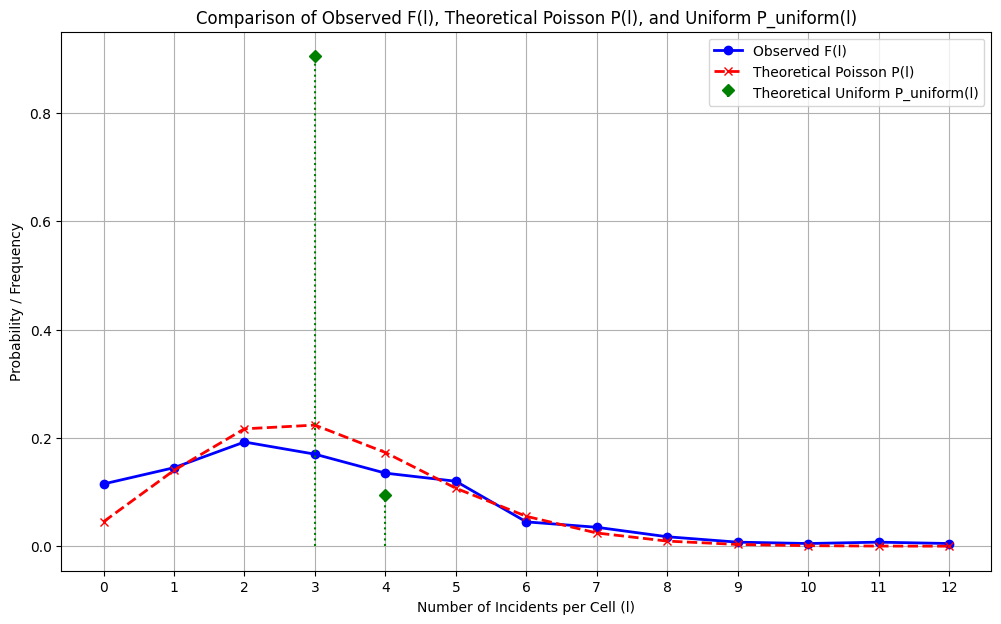

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import poisson

# --- Re-calculate frequency_Fl (copied from cell 198ab720) ---
# Assuming N, M, all_data, allrefs_data are available in kernel state or re-imported
# Get the overall x and y limits, and strip widths (recalculating to ensure consistency)
min_x = min(np.min(all_data[:, 0]), np.min(allrefs_data[:, 0]))
max_x = max(np.max(all_data[:, 0]), np.max(allrefs_data[:, 0]))
min_y = min(np.min(all_data[:, 1]), np.min(allrefs_data[:, 1]))
max_y = max(np.max(all_data[:, 1]), np.max(allrefs_data[:, 1]))

strip_width_x = (max_x - min_x) / N
strip_width_y = (max_y - min_y) / M

# Initialize a 2D array to store the count of dots in each cell
cell_counts = np.zeros((M, N), dtype=int) # (rows, columns) = (M, N)

# Iterate through each incident point in all_data
for x, y in all_data:
    # Determine which column the point falls into
    col_idx = int((x - min_x) / strip_width_x)
    # Determine which row the point falls into
    row_idx = int((y - min_y) / strip_width_y)

    # Ensure indices are within bounds (for points exactly on max_x or max_y boundary)
    col_idx = np.clip(col_idx, 0, N - 1)
    row_idx = np.clip(row_idx, 0, M - 1)

    # Increment the counter for that cell
    cell_counts[row_idx, col_idx] += 1

# Flatten the cell_counts array to get a list of counts per cell
flattened_counts = cell_counts.flatten()

# Calculate the frequency of each dot count 'l'
count_distribution = Counter(flattened_counts)

# Calculate F(l) - the frequency of cells with 'l' dots
total_cells_calculated = N * M # Re-declare for clarity, already defined as total_cells
frequency_Fl = {l: count / total_cells_calculated for l, count in sorted(count_distribution.items())}

# --- Re-calculate u (copied from cell f5891808) ---
total_incidents = all_data.shape[0]
total_cells = N * M
u = total_incidents / total_cells

# --- Re-calculate theoretical_poisson_probs (copied from cell 26dfb2fb) ---
max_l_observed = max(frequency_Fl.keys()) # Use the max observed l from the data
l_values = np.arange(max_l_observed + 1)
theoretical_poisson_probs = {l: poisson.pmf(l, u) for l in l_values}

# --- Plotting logic ---
# Prepare data for plotting observed frequencies (F(l))
observed_l_values = sorted(frequency_Fl.keys())
observed_probabilities = [frequency_Fl[l] for l in observed_l_values]

# Prepare data for plotting theoretical Poisson probabilities (P(l))
theoretical_l_values = sorted(theoretical_poisson_probs.keys())
theoretical_probabilities = [theoretical_poisson_probs[l] for l in theoretical_l_values]

# Prepare data for plotting theoretical uniform probabilities (P_uniform(l)) (from kernel state)
# Assuming uniform_Fl_distribution is available from kernel state: {3: 0.905, 4: 0.095}
# If not, it would need to be re-calculated here:
import math
floor_u = math.floor(u)
ceil_u = math.ceil(u)
n_ceil = (total_incidents - (total_cells * floor_u)) / (ceil_u - floor_u)
n_floor = total_cells - n_ceil
uniform_Fl_distribution = {
    floor_u: n_floor / total_cells,
    ceil_u: n_ceil / total_cells
}
uniform_l_values = sorted(uniform_Fl_distribution.keys())
uniform_probabilities = [uniform_Fl_distribution[l] for l in uniform_l_values]

# Determine the maximum l value for consistent plotting range
max_l = max(max(observed_l_values), max(theoretical_l_values), max(uniform_l_values))

# Create the plot
plt.figure(figsize=(12, 7))

# Plot observed frequencies
plt.plot(observed_l_values, observed_probabilities, marker='o', linestyle='-', color='blue', label='Observed F(l)', linewidth=2)

# Plot theoretical Poisson probabilities
plt.plot(theoretical_l_values, theoretical_probabilities, marker='x', linestyle='--', color='red', label='Theoretical Poisson P(l)', linewidth=2)

# Plot theoretical uniform probabilities
plt.stem(uniform_l_values, uniform_probabilities, linefmt='g:', markerfmt='Dg', basefmt=' ', label='Theoretical Uniform P_uniform(l)', orientation='vertical', bottom=0)

plt.title('Comparison of Observed F(l), Theoretical Poisson P(l), and Uniform P_uniform(l)')
plt.xlabel('Number of Incidents per Cell (l)')
plt.ylabel('Probability / Frequency')
plt.xticks(np.arange(0, max_l + 1, 1)) # Ensure x-axis ticks cover all 'l' values
plt.legend()
plt.grid(True)
plt.show()

**Analysis**

**Observed F(l) (Blue Line with 'o' markers):** This line represents the actual frequencies of l dots per cell, as observed directly from the London data. It shows how many cells had 0 dots, 1 dots, 2 dots, and so on. It shows a distribution that peaks around 2-3 dots per cell and then gradually declines, with a noticeable number of cells having 0 dots.

**Theoretical Poisson P(l) (Red Dashed Line with 'x' markers):** This distribution models what the probabilities of l dots per cell would be if the dots were occurring randomly and independently, with a constant average rate (u = 3.095). While it broadly captures the bell-like shape of the observed data, there are clear deviations:

For l=0 (cells with no dots), the observed frequency is higher than what the Poisson model predicts, suggesting more 'empty' cells than expected by pure randomness.
The peak of the Poisson distribution is slightly different from the observed, and for higher numbers of dots per cell (e.g., l > 5-6), the Poisson model often predicts higher probabilities than what was actually observed.
Theoretical Uniform P_uniform(l) (Green Stem Plot with 'D' markers): This distribution provides a sharp contrast. For a perfectly uniform distribution with an average of 3.095 dots per cell, the theory dictates that dots would be spread as evenly as possible. This means only two values of l would have non-zero probabilities: l=3 and l=4. Specifically, approximately 90.5% of cells would have 3 dots, and 9.5% would have 4 dots. All other l values would have 0% probability. The green stem plot clearly shows these two discrete points.

Overall Analysis:

The graph visually and powerfully demonstrates that the original London incident data does not fit a uniform distribution. The observed data is far more spread out and varied across different dot counts (l) than the highly concentrated two-point uniform distribution. This indicates that dots in London are not evenly or uniformly distributed across the city's grid.

While the Poisson distribution provides a much better fit than the uniform distribution, it also shows significant deviations, especially for very low and very high dot counts. This suggests that the spatial pattern of dots in London is more complex than a simple homogeneous random process, likely involving some degree of clustering or varying underlying rates across different locations.

**Summary**

In summary, this project taught me how to apply a model to fit a specific data set. The project also helped me build a further understanding of what code is capable of, aswell as how helpful the Gemini AI system is.